[View in Colaboratory](https://colab.research.google.com/github/jnfarooq/CAM/blob/master/IMDB_dataset_simple_neural_net.ipynb)

In [0]:
import keras 
from keras.datasets import imdb

# load the training and test data along with their labels and keep only the top 10,000 words. 

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [0]:
train_data.shape

(25000,)

In [0]:
# converting the index list back to the review: return a dictionary
word_index = imdb.get_word_index()

reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
decoded_review = ' '.join([reverse_word_index.get(i) for i in train_data[0]])
decoded_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [0]:
# let's do some one-hot encoding. 
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
  
  results = np.zeros((len(sequences),dimension))
  
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
# vectorize the labels as well. 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
# get the validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
# define the architectures:
# input --> Dense(16)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(partial_x_train,partial_y_train,
                   epochs = 20,
                   batch_size=512,
                   validation_data=(x_val,y_val))
model.summary()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.5916 - acc: 0.6837 - val_loss: 0.3278 - val_acc: 0.8747
Epoch 2/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.3064 - acc: 0.8823 - val_loss: 0.3092 - val_acc: 0.8782
Epoch 3/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2118 - acc: 0.9174 - val_loss: 0.2937 - val_acc: 0.8823
Epoch 4/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1426 - acc: 0.9445 - val_loss: 0.3416 - val_acc: 0.8807
Epoch 5/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.1323 - acc: 0.9499 - val_loss: 0.3610 - val_acc: 0.8822
Epoch 6/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.0830 - acc: 0.9695 - val_loss: 0.5662 - val_acc: 0.8479
Epoch 7/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.0895 - acc: 0.9675 - val_loss: 0.4107 - 

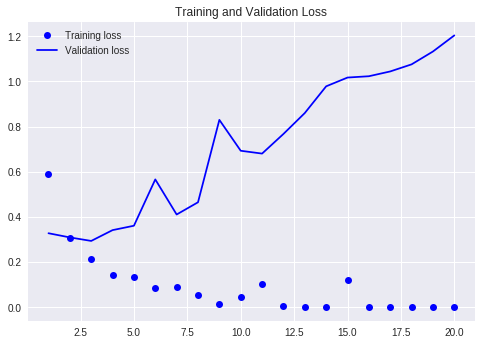

In [0]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(val_loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

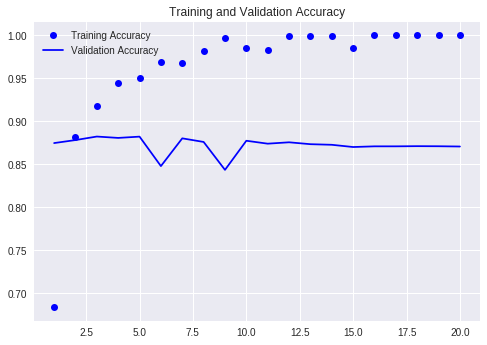

In [0]:
history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1,len(val_loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training Accuracy')
plt.plot(epochs,val_loss_values,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [0]:
results = model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 2s 75us/step


[1.3474199727664073, 0.85256]